In [37]:
import sys
import numpy as np
import pandas as pd

In [38]:
def create_sent_dict(sentiment_file):
    """A function that creates a dictionary which contains terms as keys and their sentiment score as value
        Args:
            sentiment_file (string): The name of a tab-separated file that contains
                                     all terms and scores (e.g., the AFINN file).
        Returns:
            dicitonary: A dictionary with schema d[term] = score
        """
    scores = {}
    sentiment_file = 'AFINN-111.txt' # to read strings from the command line you can use instead open(sys.argv[1])
    sentiment_file = open(sentiment_file, 'r')
    scores = {} # initialize an empty dictionary
    for line in sentiment_file:
        term, score = line.split("\t") # The file is tab-delimited and "\t" means tab character
        scores[term] = int(score) # Conver the score to an integer. It was parsed as a string.
    sentiment_file.close()

    return scores

In [39]:
def get_tweet_sentiment(tweet, sent_scores):
    """A function that find the sentiment of a tweet and outputs a sentiment score.
            Args:
                tweet (string): A clean tweet
                sent_scores (dictionary): The dictionary output by the method create_sent_dict
            Returns:
                score (numeric): The sentiment score of the tweet
        """
    score = 0

    for word in tweet.split():
        if word in sent_scores.keys():
            score = score+ sent_scores.get(word)
    return score

In [43]:
def term_sentiment(sent_scores, tweets_file):
    """A function that creates a dictionary which contains terms as keys and their sentiment score as value
            Args:
                sent_scores (dictionary): A dictionary with terms and their scores (the output of create_sent_dict)
                tweets_file (string): The name of a txt file that contain the clean tweets
            Returns:
                dicitonary: A dictionary with schema d[new_term] = score
            """

    new_term_sent = {}

    tweets = open(tweets_file, 'r')
    for tweet in tweets:
        for word in tweet.split():
            if word not in sent_scores.keys(): ## word is not in the dictionary
                score = get_tweet_sentiment(tweet, sent_scores)
                if word in new_term_sent:
                    new_term_sent[word].append(score)
                else:
                    new_term_sent[word] = [score]
    tweets.close()

    for key in new_term_sent.keys():
        value_list = new_term_sent.get(key)
        avg = np.min(value_list)
        avg = round(avg, 2)
        new_term_sent[key] = avg

    return new_term_sent

In [44]:
def main():
    sentiment_file = 'AFINN-111.txt'
    tweets_file = 'clean_tweets.txt'

    # Read the AFINN-111 data into a dictionary
    sent_scores = create_sent_dict(sentiment_file)



    # Derive the sentiment of new terms
    new_term_sent = term_sentiment(sent_scores, tweets_file)

    
    return new_term_sent.values()

res = main()

<AxesSubplot:>

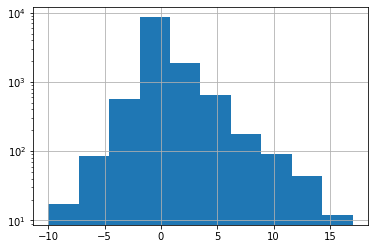

In [42]:
## max
res_series = pd.Series(list(res))
res_series.hist(log=True)

<AxesSubplot:>

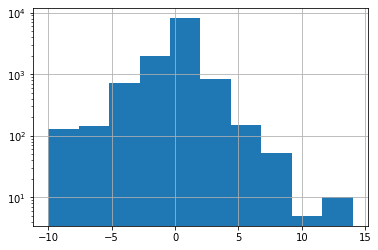

In [45]:
## min
res_series = pd.Series(list(res))
res_series.hist(log=True)

<AxesSubplot:>

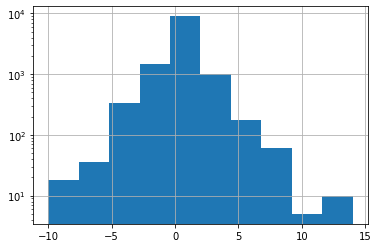

In [33]:
## median
res_series = pd.Series(list(res))
res_series.hist(log=True)

<AxesSubplot:>

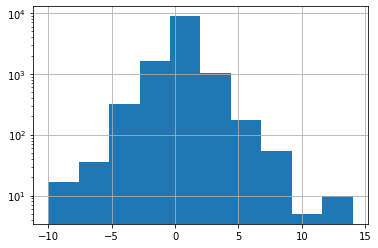

In [30]:
## mean
res_series = pd.Series(list(res))
res_series.hist(log=True) 